In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = "/content/drive/MyDrive/machine learning/actividades ml/Proyecto 2 – Parte I (Core)/dataset1.csv"
df = pd.read_csv(path)

#Inspección general de datos ---

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Cambiamos nombres de las columnas a minúsculas y espacios en caso que los haya por buena práctica

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## Limpieza de datos

Revisamos si hay valores duplicados

In [10]:
df.duplicated().sum()

## no hay valores duplicados

np.int64(0)

Se corrige el tipo de dato de la columna "totalcharges" de "object" a "float"

 -al intentar usar astype genera error (ValueError: could not convert string to float: ' ') por tanto limpiamos la columna primero con strip



In [11]:
df["totalcharges"] = df["totalcharges"].astype(str)
df["totalcharges"] = df["totalcharges"].str.strip()

In [12]:
df["totalcharges"].value_counts()

,count
totalcharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [13]:
## reemplazamos las cadenas vacias "" con nan
df["totalcharges"] = df["totalcharges"].replace('', np.nan)

In [14]:
## usamos la funcion astype para cambiar el tipo de dato nuevamente a float

df["totalcharges"] = df["totalcharges"].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


Ahora revisamos los valores nulos en "totalcharges"

In [16]:
df[df["totalcharges"].isna()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Para rellenar los datos faltantes y no eliminar la columna, asumiremos que la columna "totalcharges" es el resultado de la cantidad de meses que el cliente ha tenido el servicio "tenure" y el cobro mensual "monthlycharges" a pesar de que puede variar del monto exacto por cambios de precio a lo largo del tiempo.

Sin embargo, en esta ocasión el valor de "tenure" en todas las filas es de "0" por lo que podemos pensar que son clientes nuevos. Por tanto reemplazaremos el total con "0"

In [17]:
df["totalcharges"] = df["totalcharges"].replace(np.nan, "0")

In [18]:
# volvemos a pasar totalcharges a float ya que le asignamos un string como valor
df["totalcharges"] = df["totalcharges"].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


Para verificar que no hubiera insolvencia en los datos o cadenas con falta de ortografía ocupe estas dos funciones, value_count para las columnas con valores en string y describe para columnas con valores numéricos.

(fui cambiando el nombre de las columnas pero solo dejo dos ejemplos para no extender demasiado el codigo)

In [20]:
df["multiplelines"].value_counts()

,count
multiplelines,
No,3390
Yes,2971
No phone service,682


In [21]:
df["totalcharges"].describe()

,totalcharges
count,7043.000000
mean,2279.734304
std,2266.794470
min,0.000000
25%,398.550000
50%,1394.550000
75%,3786.600000
max,8684.800000


## Exploración de datos con Python

Exploracion univariada 1

Realice un histograma de la columna "tenure" para visualizar los "clientes fieles"

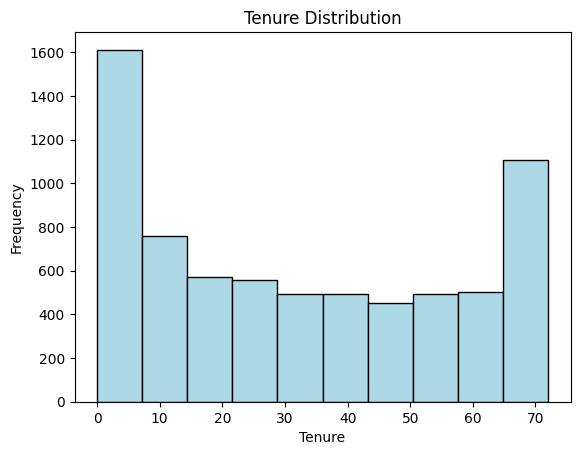

In [22]:
#Gráfico histograma en matplotlib
plt.hist(df["tenure"], bins=10, color= "lightblue", edgecolor="black")

#Títulos del gráfico
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.title("Tenure Distribution")
plt.show()

En el gráfico podemos apreciar que hay más frecuencia de clientes nuevos que antiguos, pero aún así hay una gran cantidad de clientes fieles.
Frencuency representa la cantidad de clientes y Tenure la cantidad de meses que llevan con la empresa

Exploracion univariada 2

Realice un diagrama de caja de los cargos mensuales por cliente para ver la distribucion de las cuotas

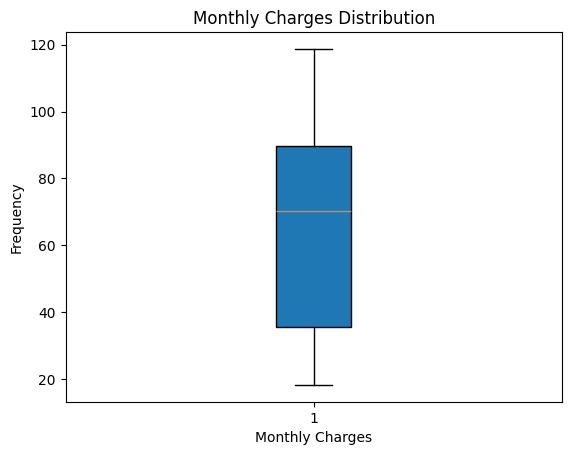

In [23]:
# Gráfico diagrama de caja
plt.boxplot(df["monthlycharges"], patch_artist=True)

#Títulos del gráfico
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.title("Monthly Charges Distribution")
plt.show()

Este diagrama de caja representa la cuota mensual que pagan los clientes, si bien hay valores que se alejan de la media, tampoco hay valores atípicos y la los valores que se alejan de la media pueden explicarse debido a que a cuota mensual varía mucho dependiendo de la cantidad de servicios que tengran contratados.

Explicarion multivariada 1

Usaremos un grafico de barras para comparar los clientes "churn" con los cargos mensuales, para saber si este monto tiene alguna relación con la cancelación del servicio.

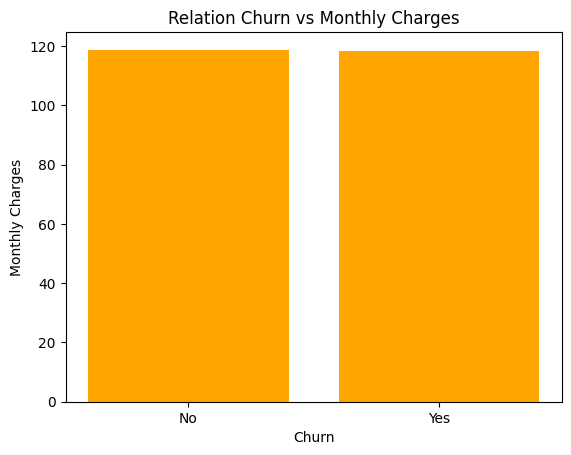

In [24]:
# Gráfico de barras
plt.bar(df["churn"], df["monthlycharges"], color= "orange")

#Títulos del gráfico

plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.title("Relation Churn vs Monthly Charges")
plt.show()

Al ver el gráfico podemos deducir que el monto del cargo mensual no tiene relación con la cancelación del contrato ya que no existe ninguna diferencia significativa.

Exploración multivariada 2

Usaremos un grafico de barras para comparar los métodos de pagos y saber por que vía se reciben más pagos.

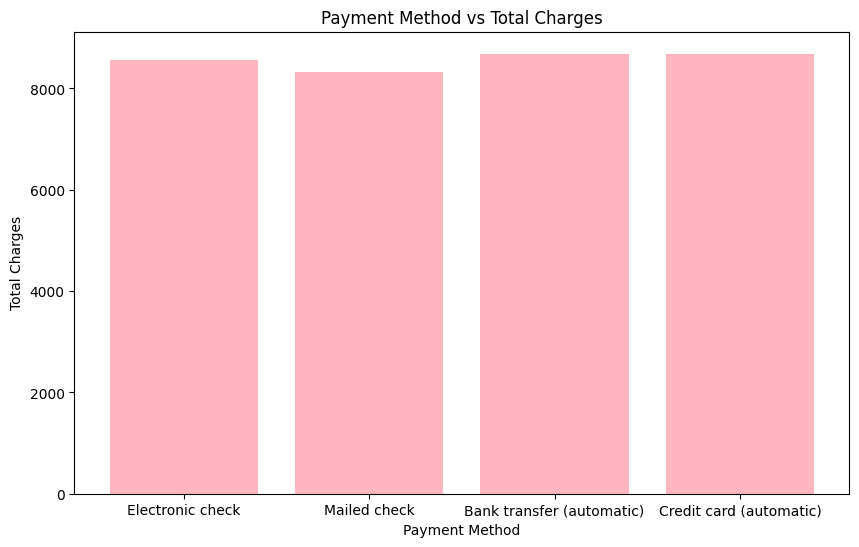

In [25]:
#Usamos figure para encajar bien la visualización dle gráfico
plt.figure(figsize=(10, 6))

#Gráfico de barras
plt.bar(df["paymentmethod"], df["totalcharges"], color="lightpink")

#Títulos del gráfico
plt.title("Payment Method vs Total Charges")
plt.xlabel("Payment Method")
plt.ylabel("Total Charges")
plt.show()

Podemos apreciar que no hay mucha diferencia en los métodos de pago respecto de los cargos totales, por tanto los 4 métodos son igual de relevantes para la empresa.